In [67]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
simDataFile = 'DATACOMP_sample.csv'
fieldDataFile = 'DATAFIELD_sample.csv'

In [87]:
# Read file
D_COMP = np.genfromtxt(simDataFile, delimiter = ',')
D_FIELD = np.genfromtxt(fieldDataFile, delimiter = ',')
ydim = 2

In [88]:
D_COMP = D_COMP[0:, :]
D_FIELD = D_FIELD[0:, :]
y = D_FIELD[:,0:ydim]
xf = D_FIELD[:,ydim:]
(n,p) = xf.shape
eta = D_COMP[:,0:ydim]
xc = D_COMP[:,ydim:(ydim+p)]
tc = D_COMP[:,(p+ydim):]
(m,q) = tc.shape
x = np.concatenate((xf,xc), axis=0)

In [89]:
yf = D_FIELD[:, 0:2]
yc = D_COMP[:, 0:2]

In [90]:
x.min(axis = 0)

array([-12.39814815, -16.51157407,   0.        ,   0.        ])

In [91]:
x = (x - x.min(axis = 0)) / x.ptp(axis = 0); # Min max norm

In [92]:
x

array([[  4.39545161e-01,   6.39730130e-01,   0.00000000e+00,
          0.00000000e+00],
       [  3.79698595e-01,   4.82240644e-01,   0.00000000e+00,
          0.00000000e+00],
       [  3.94309549e-01,   5.73699815e-01,   2.15209898e-01,
          1.08009691e-03],
       [  5.87988480e-01,   1.32423683e-01,   3.50887386e-01,
          8.85357105e-01],
       [  7.39435920e-01,   9.78110913e-01,   4.26872300e-01,
          5.29010500e-02],
       [  6.98470629e-01,   7.09950685e-01,   8.91658818e-01,
          4.02897920e-01],
       [  6.73308009e-01,   9.06634799e-01,   0.00000000e+00,
          0.00000000e+00],
       [  6.21331744e-01,   7.45076090e-01,   0.00000000e+00,
          0.00000000e+00],
       [  8.85408908e-01,   9.55510846e-01,   0.00000000e+00,
          0.00000000e+00],
       [  6.10370426e-01,   8.60345506e-01,   1.10949461e-02,
          5.94515162e-04],
       [  5.87144347e-01,   7.49039421e-01,   0.00000000e+00,
          0.00000000e+00],
       [  1.59702567e

In [71]:
yf

array([[ 21.21245165,  24.63318918],
       [ 21.491446  ,  22.33239924],
       [ 22.88611668,  38.69647434],
       [ 23.13073627,   2.76909465],
       [ 23.47063787,   0.        ],
       [ 23.48248649,   0.        ],
       [ 23.07759227,  12.65494935],
       [ 22.50915588,  11.02096103],
       [ 25.26960663,   0.        ],
       [ 20.7112187 ,   0.        ],
       [ 22.44683685,  11.0084111 ],
       [ 21.10808095,  62.47103055],
       [ 23.78432891,   0.        ],
       [ 24.29870165,   0.        ],
       [ 20.76546021,  29.24611851],
       [ 27.14153422,   0.        ],
       [ 22.83412297,  31.56423076],
       [ 22.68707187,  10.22477114],
       [ 20.0359942 ,  75.00494685],
       [ 23.00050242,  10.05461096],
       [ 21.87450218,  21.08960226],
       [ 22.67010458,  16.84897618],
       [ 18.59072329,  23.7430413 ],
       [ 22.33332067,  53.60226917],
       [ 21.40224809,  24.50032003],
       [ 22.52006194,  43.21262082],
       [ 19.98905318,  37.85543548],
 

In [72]:
yc_mu = np.nanmean(yc, axis = 0)
yc_sd = np.nanstd(yc, axis = 0)
yf = (yf - yc_mu) / yc_sd
yc = (yc - yc_mu) / yc_sd
z = np.concatenate((yf,yc), axis=0);

In [74]:
z

array([[-0.68289449, -0.00873603],
       [-0.53266294, -0.0465652 ],
       [ 0.21833266,  0.22248997],
       [ 0.35005425, -0.36822153],
       [ 0.53308284, -0.41375049],
       [ 0.53946303, -0.41375049],
       [ 0.32143753, -0.20568009],
       [ 0.01534861, -0.23254583],
       [ 1.50178295, -0.41375049],
       [-0.95279602, -0.41375049],
       [-0.01820864, -0.23275217],
       [-0.73909553,  0.61338694],
       [ 0.7019977 , -0.41375049],
       [ 0.97897467, -0.41375049],
       [-0.92358831,  0.06710893],
       [ 2.50976958, -0.41375049],
       [ 0.19033534,  0.10522291],
       [ 0.11115197, -0.24563664],
       [-1.31638768,  0.81946734],
       [ 0.27992655, -0.24843438],
       [-0.32639668, -0.06699904],
       [ 0.1020155 , -0.13672265],
       [-2.09463026, -0.02337168],
       [-0.07933429,  0.46756837],
       [-0.58069381, -0.01092064],
       [ 0.02122126,  0.29674364],
       [-1.34166426,  0.20866176],
       [ 0.04088329,  0.37307829],
       [-0.18727547,

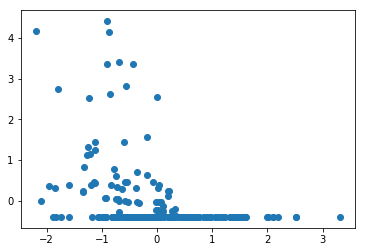

In [75]:
plt.scatter(z[:, 0], z[:, 1])
plt.show()

In [76]:
pcaz = PCA(n_components = 1)
pcaz.fit(z)
ztrans = pcaz.transform(z)

In [93]:
ztrans.reshape((-2,))

array([  5.16558135e-01,   3.77171861e-01,  -2.50372774e-02,
        -5.05719473e-01,  -6.75175946e-01,  -6.80062611e-01,
        -3.79296362e-01,  -1.62132275e-01,  -1.41711533e+00,
         4.62877031e-01,  -1.36563028e-01,   9.59594052e-01,
        -8.04549919e-01,  -1.01669001e+00,   7.49672636e-01,
        -2.18914474e+00,  -7.89900520e-02,  -2.43925918e-01,
         1.53424760e+00,  -3.74991254e-01,   2.06052144e-01,
        -1.66902485e-01,   1.58841408e+00,   3.60521447e-01,
         4.36876787e-01,   1.73673809e-01,   1.16089286e+00,
         2.07693397e-01,   5.53401506e-01,  -9.33543607e-04,
         5.92535543e-01,   2.69941979e-01,  -2.41357839e-01,
        -1.00393878e+00,   2.46932485e-01,  -1.46175665e+00,
        -7.11786538e-03,  -7.04821981e-03,   7.54601540e-01,
         5.64775728e-01,  -5.66989854e-01,   4.85765968e-01,
         7.44823648e-02,  -2.82962797e-01,   1.72960212e+00,
        -6.42051342e-01,  -1.20817644e+00,  -4.31974486e-02,
        -4.21357500e-01,

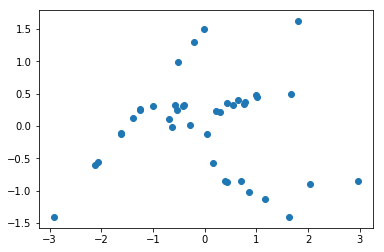

In [45]:
plt.scatter(yftrans[:, 0], yftrans[:, 1])
plt.show()